In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score

# 1. 딥러닝의 특징

- 입력층을 제외한 은닉층과 출력층은 모두 Logistic Regression 이다.
- 모든 노드는 앞 뒤로 연결되어 있다.
- 모든 레이어 사이 사이에는 가중치W가 연산이 된다.
- 입력층의 노드는 정답을 만들어내는 데이터의 갯수만큼 필요하다.
    - 출력층의 노드는 정답의 갯수이다.
    - 은닉층의 노드는 하이퍼 파라미터이다.(갯수도 마음대로 지정가능)
    - - 가중치의 개수는 [입력층의 노드 * 은닉층의 노드]
    - 파라미터를 계산한다 = 미분을 한다

# 2. 딥러닝 설계

## (1) 첫번째 설계 예시

In [5]:
inpit_data = [[1, 1], [4, 3]]
target_data = [0, 1]

## (1) 첫번쨰 설계 예시

- 가중치의 개수는 [입력층의 노드 * 은닉층의 노드]
    - ex) 입력층의 노드가 2개고, 은닉층의 노드가 4개 라면
            
              입력층  가중치(w1)   은닉층
        -      [1.2] *  [2,4] =    [1,4]
               
              은닉층  가중치(w2)   출력층 
        -      [1.4] *  [4,1] =    [1,1] (출력)
        
        - bias: 4개 필요(가중치w2 -> 출력층으로 갈 때)

In [3]:
model = Sequential()

model.add(Flatten(input_shape=(2,))) # 입력층

model.add(Dense(units=4, input_shape=(2,), activation="linear"))

model.add(Dense(1, input_shape=(4,), activation = "linear")) # 출력층

model.compile(loss="mse", optimizer=SGD(learning_rate=0.01))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2)                 0         
                                                                 
 dense_2 (Dense)             (None, 4)                 12        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


Dense_2 = Param 12 = W(인풋 노드 2 * 은닉 노드 4 = 8) + (bias = 4) = 합12

<br>

Dense_3 = Param 5 = (W2(가중치) 4개 * 출력층 노드 1) + (bias(출력층에서 나가는) 1개) = 5개

In [4]:
model = Sequential()

model.add(Flatten(input_shape=(2,))) # 입력층

model.add(Dense(units=3, input_shape=(2,), activation="linear"))

model.add(Dense(1, input_shape=(3,), activation = "linear")) # 출력층

model.compile(loss="mse", optimizer=SGD(learning_rate=0.01))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 2)                 0         
                                                                 
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


## (2) 두번째 설계 예시

- Feed forward = Full connect Layer = 레이어 그려진 그림

In [ ]:
"""
(1) 입력 데이터 : [[1,2,3,4], [0,1,2,0], [0,0,1,1]]
(2) 출력 데이터 : [0,1,0]
(3) 은닉 계층
    1) 레이어 2개 배치
    2) 첫번째 레이어의 노드는 2개, 두번째 레이어의 노드는 3개
--------------------------------------------------------------
    
W는 몇번 미분해야 하는가?



"""

In [8]:
model = Sequential()

model.add(Flatten(input_shape=(4,))) # 입력층

model.add(Dense(units=2, input_shape=(4,), activation="linear"))
model.add(Dense(units=3, input_shape=(2,), activation="linear"))

model.add(Dense(1, input_shape=(3,), activation = "linear")) # 출력층

model.compile(loss="mse", optimizer=SGD(learning_rate=0.01))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 4)                 0         
                                                                 
 dense_8 (Dense)             (None, 2)                 10        
                                                                 
 dense_9 (Dense)             (None, 3)                 9         
                                                                 
 dense_10 (Dense)            (None, 1)                 4         
                                                                 
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 이렇게 처음의 input_shape이외에는 생략도 가능하다 # Tensorflow2

model = Sequential()

model.add(Flatten(input_shape=(4,))) # 입력층

model.add(Dense(units=2, activation="linear")) 
model.add(Dense(units=3, activation="linear"))
model.add(Dense(1, activation = "linear")) # 출력층

model.compile(loss="mse", optimizer=SGD(learning_rate=0.01))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 4)                 0         
                                                                 
 dense_15 (Dense)            (None, 2)                 10        
                                                                 
 dense_16 (Dense)            (None, 3)                 9         
                                                                 
 dense_17 (Dense)            (None, 1)                 4         
                                                                 
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


In [32]:
from PIL import Image

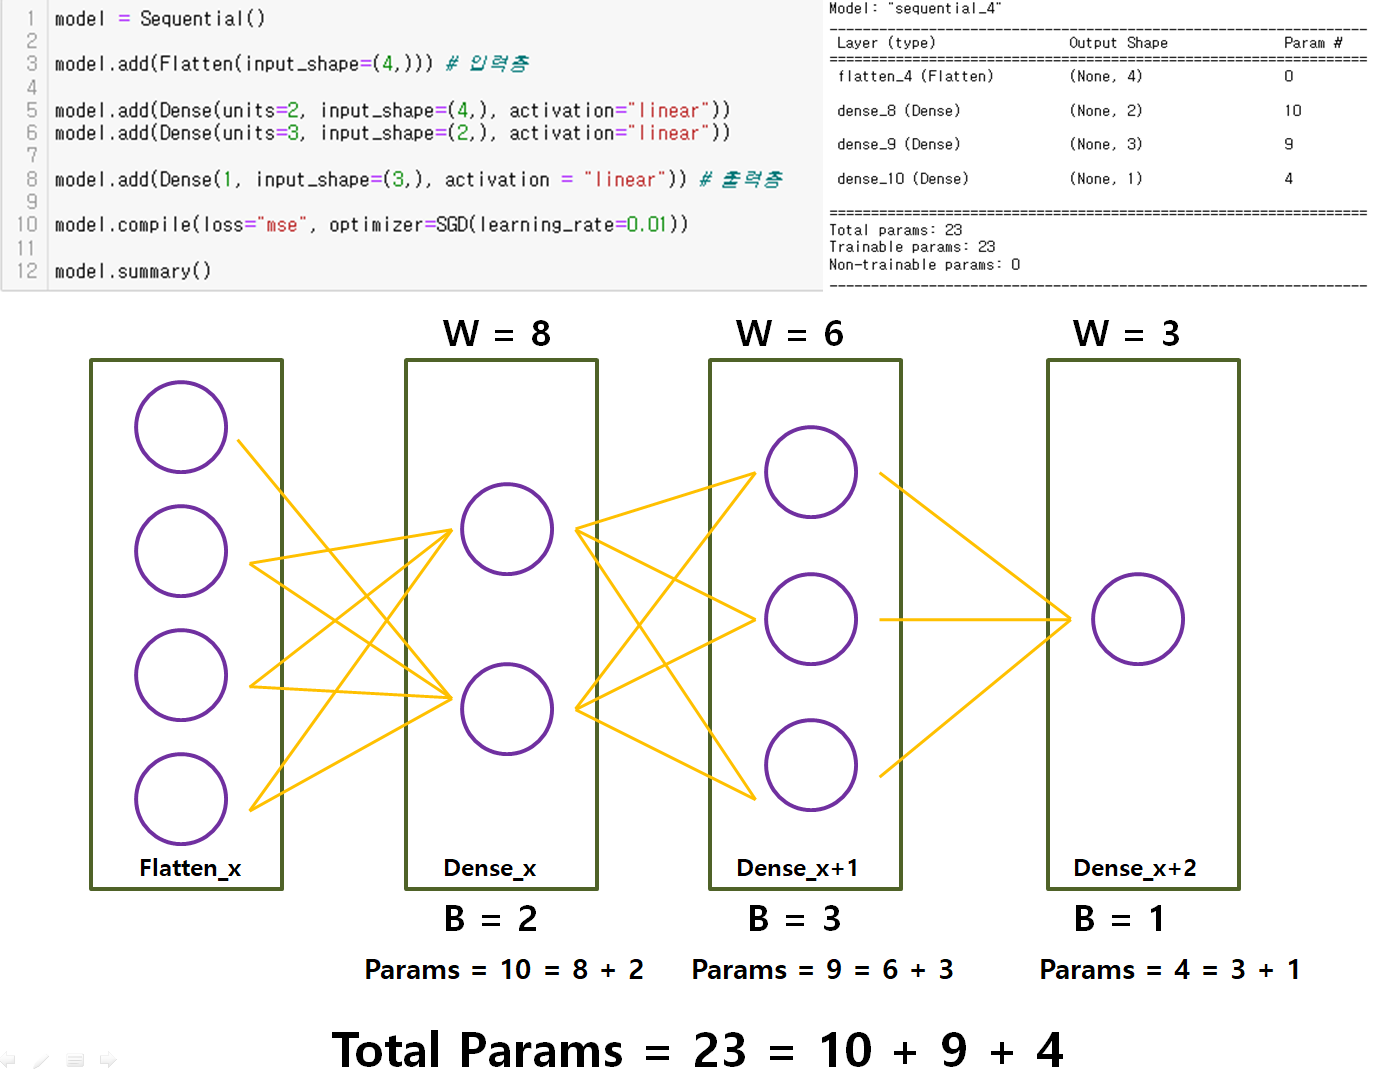

In [33]:
image = Image.open('C:\\kimhotak13\\PythonWork\\AI\\data\\dl1.png')
image

# 3. 실습
- 데이터가 많이 없고
- 초반 가중치와 편향은 random으로 정해지기 때문에 run할 때마다 결과가 달라짐.
---
- 따라서 데이터를 몇만개 이상 충분히 구하고,
- 여러번 돌려서 결과가 안정적으로 나오는지 확인해 주어야 함.


## (1) Boston Housing Sample

In [27]:
from tensorflow.keras.datasets import boston_housing

boston = boston_housing.load_data()

In [28]:
(X_train, y_train), (X_test, y_test) = boston
print(X_train.shape, X_test.shape)

(404, 13) (102, 13)


In [21]:
### SGD
# 훈련 = loss: 139.0682 - mae: 8.1286
# 테스트 = loss: 142.0428 - mae: 8.4374
model = Sequential()


model.add(Flatten(input_shape=(13,)))
model.add(Dense(1))

model.compile(loss="mse", optimizer=SGD(learning_rate=1e-7), metrics=["mae"])
# 회귀니까 metrics는 설명력 또는 평균절대오차
model.summary()

result = model.fit(X_train, y_train, epochs=100)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 13)                0         
                                                                 
 dense_20 (Dense)            (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 8018.4238 - mae: 80.3073
Epoch 2/100
13/13 [==============================] - 0s 293us/step - loss: 5228.0459 - mae: 63.2154
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 4268.9829 - mae: 56.0860
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 3708.0659 - mae: 51.2290
Epoch 5/100
13/13 [==============================] - 0s 1ms

In [22]:
# 테스트 값 구하기
mse, mae = model.evaluate(X_test, y_test)
print(mse, mae)

4/4 [==============================] - 2s 1ms/step - loss: 142.0428 - mae: 8.4374
142.04275512695312 8.437444686889648


In [25]:
### Adam
# 훈련 = loss: 47131.1602 - mae: 207.6922
# 테스트 = loss: 46549.1680 - mae: 207.5832
model = Sequential()


model.add(Flatten(input_shape=(13,)))
model.add(Dense(1))

model.compile(loss="mse", optimizer=Adam(learning_rate=1e-7), metrics=["mae"])
# 회귀니까 metrics는 설명력 또는 평균절대오차
model.summary()

result = model.fit(X_train, y_train, epochs=100)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 13)                0         
                                                                 
 dense_21 (Dense)            (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 47183.4961 - mae: 207.8089
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 47182.9648 - mae: 207.8078
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 47182.4414 - mae: 207.8066
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 47181.9102 - mae: 207.8054
Epoch 5/100
13/13 [==============================] - 

In [26]:
# 테스트 값 구하기
mse, mae = model.evaluate(X_test, y_test)
print(mse, mae)

4/4 [==============================] - 0s 0s/step - loss: 46549.1680 - mae: 207.5832
46549.16796875 207.58316040039062


In [29]:
### RMSprop
# 훈련 = loss: 15101.0420 - mae: 95.0728
# 테스트 = loss: 15286.9131 - mae: 97.7775
model = Sequential()


model.add(Flatten(input_shape=(13,)))
model.add(Dense(1))

model.compile(loss="mse", optimizer=RMSprop(learning_rate=1e-7), metrics=["mae"])
# 회귀니까 metrics는 설명력 또는 평균절대오차
model.summary()

result = model.fit(X_train, y_train, epochs=100)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 13)                0         
                                                                 
 dense_22 (Dense)            (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 0s 679us/step - loss: 15125.3516 - mae: 95.1867
Epoch 2/100
13/13 [==============================] - 0s 182us/step - loss: 15125.0498 - mae: 95.1853
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 15124.7861 - mae: 95.1841
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 15124.5420 - mae: 95.1829
Epoch 5/100
13/13 [==============================] - 

13/13 [==============================] - 0s 0s/step - loss: 15106.9209 - mae: 95.1003
Epoch 77/100
13/13 [==============================] - 0s 47us/step - loss: 15106.6758 - mae: 95.0991
Epoch 78/100
13/13 [==============================] - 0s 1ms/step - loss: 15106.4307 - mae: 95.0980
Epoch 79/100
13/13 [==============================] - 0s 1ms/step - loss: 15106.1855 - mae: 95.0969
Epoch 80/100
13/13 [==============================] - 0s 1ms/step - loss: 15105.9414 - mae: 95.0957
Epoch 81/100
13/13 [==============================] - 0s 0s/step - loss: 15105.7031 - mae: 95.0946
Epoch 82/100
13/13 [==============================] - 0s 0s/step - loss: 15105.4541 - mae: 95.0935
Epoch 83/100
13/13 [==============================] - 0s 1ms/step - loss: 15105.2100 - mae: 95.0923
Epoch 84/100
13/13 [==============================] - 0s 1ms/step - loss: 15104.9707 - mae: 95.0912
Epoch 85/100
13/13 [==============================] - 0s 1ms/step - loss: 15104.7275 - mae: 95.0900
Epoch 86/100
13

In [30]:
# 테스트 값 구하기
mse, mae = model.evaluate(X_test, y_test)
print(mse, mae)

4/4 [==============================] - 0s 5ms/step - loss: 15286.9131 - mae: 97.7775
15286.9130859375 97.77751922607422


### 2) 은닉층을 1개 배치(입출력 갯수 : 64개)

In [42]:
boston = boston_housing.load_data()

(X_train, y_train), (X_test, y_test) = boston
print(X_train.shape, X_test.shape)

(404, 13) (102, 13)


In [37]:
### SGD

model = Sequential()


model.add(Flatten(input_shape=(13,)))
model.add(Dense(units=64))
model.add(Dense(1))

model.compile(loss="mse", optimizer=SGD(learning_rate=1e-7), metrics=["mae"])
# 회귀니까 metrics는 설명력 또는 평균절대오차
model.summary()

result = model.fit(X_train, y_train, epochs=100)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 13)                0         
                                                                 
 dense_25 (Dense)            (None, 64)                896       
                                                                 
 dense_26 (Dense)            (None, 1)                 65        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 1210.1921 - mae: 30.1184
Epoch 2/100
13/13 [==============================] - 0s 241us/step - loss: 434.3707 - mae: 17.7346
Epoch 3/100
13/13 [==============================] - 0s 259us/step - loss: 303.9475 - mae: 14.5609
Epoch 4/100
13/13 [====

In [38]:
# 테스트 값 구하기
mse, mae = model.evaluate(X_test, y_test)
print(mse, mae)

4/4 [==============================] - 0s 3ms/step - loss: 81.4842 - mae: 6.6346
81.48419952392578 6.634639263153076


In [40]:
### Adam

model = Sequential()


model.add(Flatten(input_shape=(13,)))
model.add(Dense(units=64))
model.add(Dense(1))

model.compile(loss="mse", optimizer=Adam(learning_rate=1e-7), metrics=["mae"])
# 회귀니까 metrics는 설명력 또는 평균절대오차
model.summary()

result = model.fit(X_train, y_train, epochs=100)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 13)                0         
                                                                 
 dense_27 (Dense)            (None, 64)                896       
                                                                 
 dense_28 (Dense)            (None, 1)                 65        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 45098.6094 - mae: 196.7757
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 45091.9023 - mae: 196.7597
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 45085.0781 - mae: 196.7437
Epoch 4/100
13/13 [

In [41]:
# 테스트 값 구하기
mse, mae = model.evaluate(X_test, y_test)
print(mse, mae)

4/4 [==============================] - 0s 1ms/step - loss: 46877.9023 - mae: 200.5059
46877.90234375 200.50587463378906


In [43]:
### RMSprop

model = Sequential()


model.add(Flatten(input_shape=(13,)))
model.add(Dense(units=64))
model.add(Dense(1))

model.compile(loss="mse", optimizer=RMSprop(learning_rate=1e-7), metrics=["mae"])
# 회귀니까 metrics는 설명력 또는 평균절대오차
model.summary()

result = model.fit(X_train, y_train, epochs=100)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 13)                0         
                                                                 
 dense_29 (Dense)            (None, 64)                896       
                                                                 
 dense_30 (Dense)            (None, 1)                 65        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 19933.3359 - mae: 100.3172
Epoch 2/100
13/13 [==============================] - 0s 978us/step - loss: 19928.6777 - mae: 100.3012
Epoch 3/100
13/13 [==============================] - 0s 0s/step - loss: 19924.6953 - mae: 100.2876
Epoch 4/100
13/13 

In [44]:
# 테스트 값 구하기
mse, mae = model.evaluate(X_test, y_test)
print(mse, mae)

4/4 [==============================] - 0s 1ms/step - loss: 19989.3672 - mae: 101.9271
19989.3671875 101.92708587646484


### 3) 은닉층 2개 배치(입출력 갯수 : 64개)

In [54]:
boston = boston_housing.load_data()

(X_train, y_train), (X_test, y_test) = boston
print(X_train.shape, X_test.shape)

(404, 13) (102, 13)


In [49]:
### SGD

model = Sequential()


model.add(Flatten(input_shape=(13,)))
model.add(Dense(units=64))
model.add(Dense(units=64))
model.add(Dense(1))

model.compile(loss="mse", optimizer=SGD(learning_rate=1e-7), metrics=["mae"])
# 회귀니까 metrics는 설명력 또는 평균절대오차
model.summary()

result = model.fit(X_train, y_train, epochs=100)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 13)                0         
                                                                 
 dense_34 (Dense)            (None, 64)                896       
                                                                 
 dense_35 (Dense)            (None, 64)                4160      
                                                                 
 dense_36 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 499.4608 - mae: 18.5363
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 247.0005 - ma

In [50]:
# 테스트 값 구하기
mse, mae = model.evaluate(X_test, y_test)
print(mse, mae)

4/4 [==============================] - 0s 4ms/step - loss: 97.4538 - mae: 7.6753
97.45377349853516 7.675309658050537


In [52]:
### Adam

model = Sequential()


model.add(Flatten(input_shape=(13,)))
model.add(Dense(units=64))
model.add(Dense(units=64))
model.add(Dense(1))

model.compile(loss="mse", optimizer=Adam(learning_rate=1e-7), metrics=["mae"])
# 회귀니까 metrics는 설명력 또는 평균절대오차
model.summary()

result = model.fit(X_train, y_train, epochs=100)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 13)                0         
                                                                 
 dense_37 (Dense)            (None, 64)                896       
                                                                 
 dense_38 (Dense)            (None, 64)                4160      
                                                                 
 dense_39 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 7313.4380 - mae: 63.4673
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 7307.2197 - 

In [53]:
# 테스트 값 구하기
mse, mae = model.evaluate(X_test, y_test)
print(mse, mae)

4/4 [==============================] - 0s 1ms/step - loss: 6641.1523 - mae: 65.3598
6641.15234375 65.35981750488281


In [55]:
### RMSprop

model = Sequential()


model.add(Flatten(input_shape=(13,)))
model.add(Dense(units=64))
model.add(Dense(units=64))
model.add(Dense(1))

model.compile(loss="mse", optimizer=RMSprop(learning_rate=1e-7), metrics=["mae"])
# 회귀니까 metrics는 설명력 또는 평균절대오차
model.summary()

result = model.fit(X_train, y_train, epochs=100)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 13)                0         
                                                                 
 dense_40 (Dense)            (None, 64)                896       
                                                                 
 dense_41 (Dense)            (None, 64)                4160      
                                                                 
 dense_42 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 32824.1133 - mae: 170.8324
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 32791.5273

In [56]:
# 테스트 값 구하기
mse, mae = model.evaluate(X_test, y_test)
print(mse, mae)

4/4 [==============================] - 0s 4ms/step - loss: 32269.1230 - mae: 168.8848
32269.123046875 168.8848114013672


## (2) XOR 샘플

### 1) OR gate

In [70]:
X = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]], dtype=np.float32)

y = np.array([[0], [1], [1], [1], [1], [1], [1], [1]], dtype=np.float32)

model = Sequential()
model.add(Flatten(input_shape=(3,)))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=["binary_accuracy"])
model.summary()

model.fit(X, y, epochs=1000)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 3)                 0         
                                                                 
 dense_46 (Dense)            (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 0s 260ms/step - loss: 0.7879 - binary_accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.7756 - binary_accuracy: 0.3750
Epoch 3/1000
1/1 [==============================] - 0s 0s/step - loss: 0.7634 - binary_accuracy: 0.3750
Epoch 4/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.7513 - binary_accuracy: 0.3750
Epoch 5/1000
1/1 [===============

1/1 [==============================] - 0s 0s/step - loss: 0.3341 - binary_accuracy: 0.8750
Epoch 73/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.3319 - binary_accuracy: 0.8750
Epoch 74/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.3298 - binary_accuracy: 0.8750
Epoch 75/1000
1/1 [==============================] - 0s 0s/step - loss: 0.3277 - binary_accuracy: 0.8750
Epoch 76/1000
1/1 [==============================] - 0s 0s/step - loss: 0.3256 - binary_accuracy: 0.8750
Epoch 77/1000
1/1 [==============================] - 0s 0s/step - loss: 0.3236 - binary_accuracy: 0.8750
Epoch 78/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.3217 - binary_accuracy: 0.8750
Epoch 79/1000
1/1 [==============================] - 0s 0s/step - loss: 0.3198 - binary_accuracy: 0.8750
Epoch 80/1000
1/1 [==============================] - 0s 0s/step - loss: 0.3180 - binary_accuracy: 0.8750
Epoch 81/1000
1/1 [==============================] - 0s 0s/step -

1/1 [==============================] - 0s 14ms/step - loss: 0.2210 - binary_accuracy: 0.8750
Epoch 226/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2207 - binary_accuracy: 0.8750
Epoch 227/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2204 - binary_accuracy: 0.8750
Epoch 228/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2201 - binary_accuracy: 0.8750
Epoch 229/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.2198 - binary_accuracy: 0.8750
Epoch 230/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2195 - binary_accuracy: 0.8750
Epoch 231/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2192 - binary_accuracy: 0.8750
Epoch 232/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2189 - binary_accuracy: 0.8750
Epoch 233/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2186 - binary_accuracy: 0.8750
Epoch 234/1000
1/1 [==============================] -

Epoch 302/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1995 - binary_accuracy: 0.8750
Epoch 303/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1992 - binary_accuracy: 0.8750
Epoch 304/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1990 - binary_accuracy: 0.8750
Epoch 305/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1987 - binary_accuracy: 0.8750
Epoch 306/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1984 - binary_accuracy: 0.8750
Epoch 307/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1982 - binary_accuracy: 0.8750
Epoch 308/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1979 - binary_accuracy: 0.8750
Epoch 309/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.1977 - binary_accuracy: 0.8750
Epoch 310/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1974 - binary_accuracy: 0.8750
Epoch 311/1000
1/1 [=====================

1/1 [==============================] - 0s 13ms/step - loss: 0.1629 - binary_accuracy: 0.8750
Epoch 455/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1626 - binary_accuracy: 0.8750
Epoch 456/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1624 - binary_accuracy: 0.8750
Epoch 457/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1622 - binary_accuracy: 0.8750
Epoch 458/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.1620 - binary_accuracy: 0.8750
Epoch 459/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1618 - binary_accuracy: 0.8750
Epoch 460/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1615 - binary_accuracy: 0.8750
Epoch 461/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1613 - binary_accuracy: 0.8750
Epoch 462/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.1611 - binary_accuracy: 0.8750
Epoch 463/1000
1/1 [==============================] -

1/1 [==============================] - 0s 12ms/step - loss: 0.1326 - binary_accuracy: 1.0000
Epoch 607/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1324 - binary_accuracy: 1.0000
Epoch 608/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1322 - binary_accuracy: 1.0000
Epoch 609/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1320 - binary_accuracy: 1.0000
Epoch 610/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.1318 - binary_accuracy: 1.0000
Epoch 611/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1317 - binary_accuracy: 1.0000
Epoch 612/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1315 - binary_accuracy: 1.0000
Epoch 613/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1313 - binary_accuracy: 1.0000
Epoch 614/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.1311 - binary_accuracy: 1.0000
Epoch 615/1000
1/1 [==============================] -

1/1 [==============================] - 0s 0s/step - loss: 0.1085 - binary_accuracy: 1.0000
Epoch 759/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.1084 - binary_accuracy: 1.0000
Epoch 760/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1082 - binary_accuracy: 1.0000
Epoch 761/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1081 - binary_accuracy: 1.0000
Epoch 762/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1080 - binary_accuracy: 1.0000
Epoch 763/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.1078 - binary_accuracy: 1.0000
Epoch 764/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1077 - binary_accuracy: 1.0000
Epoch 765/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1075 - binary_accuracy: 1.0000
Epoch 766/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1074 - binary_accuracy: 1.0000
Epoch 767/1000
1/1 [==============================] - 0

1/1 [==============================] - 0s 12ms/step - loss: 0.0984 - binary_accuracy: 1.0000
Epoch 836/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0982 - binary_accuracy: 1.0000
Epoch 837/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0981 - binary_accuracy: 1.0000
Epoch 838/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0980 - binary_accuracy: 1.0000
Epoch 839/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0979 - binary_accuracy: 1.0000
Epoch 840/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0978 - binary_accuracy: 1.0000
Epoch 841/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0976 - binary_accuracy: 1.0000
Epoch 842/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0975 - binary_accuracy: 1.0000
Epoch 843/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0974 - binary_accuracy: 1.0000
Epoch 844/1000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 14ms/step - loss: 0.0894 - binary_accuracy: 1.0000
Epoch 913/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0893 - binary_accuracy: 1.0000
Epoch 914/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0892 - binary_accuracy: 1.0000
Epoch 915/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0891 - binary_accuracy: 1.0000
Epoch 916/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0890 - binary_accuracy: 1.0000
Epoch 917/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0889 - binary_accuracy: 1.0000
Epoch 918/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0887 - binary_accuracy: 1.0000
Epoch 919/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0886 - binary_accuracy: 1.0000
Epoch 920/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0885 - binary_accuracy: 1.0000
Epoch 921/1000
1/1 [==============================] -

1/1 [==============================] - 0s 4ms/step - loss: 0.0814 - binary_accuracy: 1.0000
Epoch 990/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0813 - binary_accuracy: 1.0000
Epoch 991/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0812 - binary_accuracy: 1.0000
Epoch 992/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0811 - binary_accuracy: 1.0000
Epoch 993/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0810 - binary_accuracy: 1.0000
Epoch 994/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0810 - binary_accuracy: 1.0000
Epoch 995/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0809 - binary_accuracy: 1.0000
Epoch 996/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0808 - binary_accuracy: 1.0000
Epoch 997/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0807 - binary_accuracy: 1.0000
Epoch 998/1000
1/1 [==============================] - 0s

In [71]:
model.predict(X)

1/1 [==============================] - 0s 62ms/step


array([[0.31812137],
       [0.9262829 ],
       [0.930734  ],
       [0.9972445 ],
       [0.90439284],
       [0.996343  ],
       [0.9960903 ],
       [0.99986374]], dtype=float32)

- [0, 0, 0]을 제외하고는 모두 1이 나왔다

In [75]:
model.predict([[0,0,1]])

1/1 [==============================] - 0s 32ms/step


array([[0.9262829]], dtype=float32)

### 2. AND Gate

In [76]:
X = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]], dtype=np.float32)

y = np.array([[0], [0], [0], [0], [0], [0], [0], [1]], dtype=np.float32)

model = Sequential()
model.add(Flatten(input_shape=(3,)))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=["binary_accuracy"])
model.summary()

model.fit(X, y, epochs=1000)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 3)                 0         
                                                                 
 dense_47 (Dense)            (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 0s 271ms/step - loss: 0.5970 - binary_accuracy: 0.8750
Epoch 2/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.5950 - binary_accuracy: 0.8750
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5930 - binary_accuracy: 0.8750
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5910 - binary_accuracy: 0.8750
Epoch 5/1000
1/1 [==============

1/1 [==============================] - 0s 0s/step - loss: 0.3933 - binary_accuracy: 0.8750
Epoch 150/1000
1/1 [==============================] - 0s 0s/step - loss: 0.3923 - binary_accuracy: 0.8750
Epoch 151/1000
1/1 [==============================] - 0s 0s/step - loss: 0.3914 - binary_accuracy: 0.8750
Epoch 152/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.3905 - binary_accuracy: 0.8750
Epoch 153/1000
1/1 [==============================] - 0s 0s/step - loss: 0.3896 - binary_accuracy: 0.8750
Epoch 154/1000
1/1 [==============================] - 0s 0s/step - loss: 0.3887 - binary_accuracy: 0.8750
Epoch 155/1000
1/1 [==============================] - 0s 0s/step - loss: 0.3878 - binary_accuracy: 0.8750
Epoch 156/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3869 - binary_accuracy: 0.8750
Epoch 157/1000
1/1 [==============================] - 0s 0s/step - loss: 0.3860 - binary_accuracy: 0.8750
Epoch 158/1000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 324us/step - loss: 0.2907 - binary_accuracy: 0.8750
Epoch 303/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2902 - binary_accuracy: 0.8750
Epoch 304/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2897 - binary_accuracy: 0.8750
Epoch 305/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2893 - binary_accuracy: 0.8750
Epoch 306/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2888 - binary_accuracy: 0.8750
Epoch 307/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2883 - binary_accuracy: 0.8750
Epoch 308/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2878 - binary_accuracy: 0.8750
Epoch 309/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.2873 - binary_accuracy: 0.8750
Epoch 310/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2869 - binary_accuracy: 0.8750
Epoch 311/1000
1/1 [==============================] -

1/1 [==============================] - 0s 0s/step - loss: 0.2319 - binary_accuracy: 0.8750
Epoch 456/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2316 - binary_accuracy: 0.8750
Epoch 457/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2313 - binary_accuracy: 0.8750
Epoch 458/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2310 - binary_accuracy: 0.8750
Epoch 459/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2307 - binary_accuracy: 0.8750
Epoch 460/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2304 - binary_accuracy: 0.8750
Epoch 461/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2301 - binary_accuracy: 0.8750
Epoch 462/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2298 - binary_accuracy: 0.8750
Epoch 463/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2295 - binary_accuracy: 0.8750
Epoch 464/1000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 0s/step - loss: 0.2106 - binary_accuracy: 0.8750
Epoch 533/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.2104 - binary_accuracy: 0.8750
Epoch 534/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2101 - binary_accuracy: 0.8750
Epoch 535/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2099 - binary_accuracy: 0.8750
Epoch 536/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2096 - binary_accuracy: 0.8750
Epoch 537/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2094 - binary_accuracy: 0.8750
Epoch 538/1000
1/1 [==============================] - 0s 744us/step - loss: 0.2091 - binary_accuracy: 0.8750
Epoch 539/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2089 - binary_accuracy: 0.8750
Epoch 540/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2086 - binary_accuracy: 0.8750
Epoch 541/1000
1/1 [==============================] -

1/1 [==============================] - 0s 14ms/step - loss: 0.1779 - binary_accuracy: 1.0000
Epoch 686/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1777 - binary_accuracy: 1.0000
Epoch 687/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1776 - binary_accuracy: 1.0000
Epoch 688/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1774 - binary_accuracy: 1.0000
Epoch 689/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1772 - binary_accuracy: 1.0000
Epoch 690/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1770 - binary_accuracy: 1.0000
Epoch 691/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1768 - binary_accuracy: 1.0000
Epoch 692/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1766 - binary_accuracy: 1.0000
Epoch 693/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1765 - binary_accuracy: 1.0000
Epoch 694/1000
1/1 [==============================] - 0s

1/1 [==============================] - 0s 3ms/step - loss: 0.1648 - binary_accuracy: 1.0000
Epoch 763/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1646 - binary_accuracy: 1.0000
Epoch 764/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1645 - binary_accuracy: 1.0000
Epoch 765/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1643 - binary_accuracy: 1.0000
Epoch 766/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1642 - binary_accuracy: 1.0000
Epoch 767/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1640 - binary_accuracy: 1.0000
Epoch 768/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1638 - binary_accuracy: 1.0000
Epoch 769/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1637 - binary_accuracy: 1.0000
Epoch 770/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1635 - binary_accuracy: 1.0000
Epoch 771/1000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 0s/step - loss: 0.1533 - binary_accuracy: 1.0000
Epoch 840/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1531 - binary_accuracy: 1.0000
Epoch 841/1000
1/1 [==============================] - 0s 883us/step - loss: 0.1530 - binary_accuracy: 1.0000
Epoch 842/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1528 - binary_accuracy: 1.0000
Epoch 843/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1527 - binary_accuracy: 1.0000
Epoch 844/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.1526 - binary_accuracy: 1.0000
Epoch 845/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1524 - binary_accuracy: 1.0000
Epoch 846/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1523 - binary_accuracy: 1.0000
Epoch 847/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1521 - binary_accuracy: 1.0000
Epoch 848/1000
1/1 [==============================] - 

1/1 [==============================] - 0s 0s/step - loss: 0.1341 - binary_accuracy: 1.0000
Epoch 992/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1340 - binary_accuracy: 1.0000
Epoch 993/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.1339 - binary_accuracy: 1.0000
Epoch 994/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1338 - binary_accuracy: 1.0000
Epoch 995/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1336 - binary_accuracy: 1.0000
Epoch 996/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1335 - binary_accuracy: 1.0000
Epoch 997/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.1334 - binary_accuracy: 1.0000
Epoch 998/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1333 - binary_accuracy: 1.0000
Epoch 999/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1332 - binary_accuracy: 1.0000
Epoch 1000/1000
1/1 [==============================] - 

In [77]:
model.predict(X)

1/1 [==============================] - 0s 34ms/step


array([[0.00253908],
       [0.02235885],
       [0.02215807],
       [0.16915095],
       [0.02184376],
       [0.1658278 ],
       [0.16710794],
       [0.6410674 ]], dtype=float32)

In [78]:
model.predict([[0,0,1]])

1/1 [==============================] - 0s 46ms/step


array([[0.02235885]], dtype=float32)

### 3. XOR Gate

In [79]:
X = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]], dtype=np.float32)

y = np.array([[0], [1], [1], [1], [1], [1], [1], [0]], dtype=np.float32)

model = Sequential()
model.add(Flatten(input_shape=(3,)))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=["binary_accuracy"])
model.summary()

model.fit(X, y, epochs=1000)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 3)                 0         
                                                                 
 dense_48 (Dense)            (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 0s 254ms/step - loss: 1.0790 - binary_accuracy: 0.2500
Epoch 2/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.0667 - binary_accuracy: 0.1250
Epoch 3/1000
1/1 [==============================] - 0s 0s/step - loss: 1.0546 - binary_accuracy: 0.1250
Epoch 4/1000
1/1 [==============================] - 0s 0s/step - loss: 1.0426 - binary_accuracy: 0.1250
Epoch 5/1000
1/1 [=================

1/1 [==============================] - 0s 0s/step - loss: 0.5691 - binary_accuracy: 0.7500
Epoch 150/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.5690 - binary_accuracy: 0.7500
Epoch 151/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5690 - binary_accuracy: 0.7500
Epoch 152/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5689 - binary_accuracy: 0.7500
Epoch 153/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5688 - binary_accuracy: 0.7500
Epoch 154/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.5688 - binary_accuracy: 0.7500
Epoch 155/1000
1/1 [==============================] - 0s 892us/step - loss: 0.5687 - binary_accuracy: 0.7500
Epoch 156/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5686 - binary_accuracy: 0.7500
Epoch 157/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5685 - binary_accuracy: 0.7500
Epoch 158/1000
1/1 [==============================] -

Epoch 302/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5639 - binary_accuracy: 0.7500
Epoch 303/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5639 - binary_accuracy: 0.7500
Epoch 304/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5639 - binary_accuracy: 0.7500
Epoch 305/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.5639 - binary_accuracy: 0.7500
Epoch 306/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5638 - binary_accuracy: 0.7500
Epoch 307/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5638 - binary_accuracy: 0.7500
Epoch 308/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5638 - binary_accuracy: 0.7500
Epoch 309/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.5638 - binary_accuracy: 0.7500
Epoch 310/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.5638 - binary_accuracy: 0.7500
Epoch 311/1000
1/1 [===================

1/1 [==============================] - 0s 0s/step - loss: 0.5627 - binary_accuracy: 0.7500
Epoch 455/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5627 - binary_accuracy: 0.7500
Epoch 456/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5627 - binary_accuracy: 0.7500
Epoch 457/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5627 - binary_accuracy: 0.7500
Epoch 458/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5627 - binary_accuracy: 0.7500
Epoch 459/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5627 - binary_accuracy: 0.7500
Epoch 460/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5627 - binary_accuracy: 0.7500
Epoch 461/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5627 - binary_accuracy: 0.7500
Epoch 462/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5627 - binary_accuracy: 0.7500
Epoch 463/1000
1/1 [==============================] - 0s 0

Epoch 531/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.5625 - binary_accuracy: 0.7500
Epoch 532/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5625 - binary_accuracy: 0.7500
Epoch 533/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5625 - binary_accuracy: 0.7500
Epoch 534/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.5625 - binary_accuracy: 0.7500
Epoch 535/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5625 - binary_accuracy: 0.7500
Epoch 536/1000
1/1 [==============================] - 0s 643us/step - loss: 0.5625 - binary_accuracy: 0.7500
Epoch 537/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5625 - binary_accuracy: 0.7500
Epoch 538/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5625 - binary_accuracy: 0.7500
Epoch 539/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5625 - binary_accuracy: 0.7500
Epoch 540/1000
1/1 [==================

Epoch 684/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 685/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 686/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 687/1000
1/1 [==============================] - 0s 967us/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 688/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 689/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 690/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 691/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 692/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 693/1000
1/1 [===================

1/1 [==============================] - 0s 0s/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 837/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 838/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 839/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 840/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 841/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 842/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 843/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 844/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 845/1000
1/1 [==============================] - 0

Epoch 913/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 914/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 915/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 916/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 917/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 918/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 919/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 920/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 921/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 922/1000
1/1 [====================

- 0.75에서 발전이 없다..........

## (5) 두번째 겨울 - Vanishing gradient 

- 역전파 알고리즘을 사용하여 신경망을 학습시킬 때 그래디언트(gradient)가 사라지는 현상
---
- 역전파 알고리즘은 오차를 역으로 전파하여 각 뉴런의 가중치를 조정하는데, 이 과정에서 활성화 함수의 미분 값을 곱하게 됨.
- 초기 인공 신경망에서는 주로 시그모이드 함수와 같은 S자 모양의 활성화 함수가 사용되었는데 이 함수는 입력이 크거나 작을 때 미분 값이 매우 작아지는 특성이 있음
- 역전파 알고리즘이 여러 층을 거치면서 그래디언트가 점차 작아지게 되고, 뒤로 갈수록 그래디언트 값이 소멸되는 현상이 발생
---
- 이를 극복하고자 ReLU (Rectified Linear Unit)와 같은 활성화 함수거 등장했고, 이는 그래디언트 소실 문제를 완화
---
- Relu ->  입력이 0보다 작을 경우 0을 출력하고, 입력이 0보다 큰 경우에는 입력 값을 그대로 출력
- 탄젠트 h ->   입력값에 대해 -1에서 1 사이의 출력값을 반환

## 4) XOR gate

- 딥러닝 설계
    - hidden layer : 3개
    - 각각의 입출력 갯수는 64개

- Vanishing Gradient 방지 위해 relu
- https://heytech.tistory.com/388
- 탄젠트는 주로 자연어 처리를 위해 사용

In [85]:
X = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]], dtype=np.float32)

y = np.array([[0], [1], [1], [1], [1], [1], [1], [0]], dtype=np.float32)

model = Sequential()
model.add(Flatten(input_shape=(3,)))
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=64, activation="relu"))
model.add(Dense(1, activation="sigmoid")) # 마지막은 sigmoid로 남겨둬야함

model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=["binary_accuracy"])
model.summary()

model.fit(X, y, epochs=1000)

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_28 (Flatten)        (None, 3)                 0         
                                                                 
 dense_57 (Dense)            (None, 64)                256       
                                                                 
 dense_58 (Dense)            (None, 64)                4160      
                                                                 
 dense_59 (Dense)            (None, 64)                4160      
                                                                 
 dense_60 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,641
Trainable params: 8,641
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] -

1/1 [==============================] - 0s 2ms/step - loss: 4.4894e-07 - binary_accuracy: 1.0000
Epoch 142/1000
1/1 [==============================] - 0s 0s/step - loss: 4.4755e-07 - binary_accuracy: 1.0000
Epoch 143/1000
1/1 [==============================] - 0s 0s/step - loss: 4.4617e-07 - binary_accuracy: 1.0000
Epoch 144/1000
1/1 [==============================] - 0s 3ms/step - loss: 4.4482e-07 - binary_accuracy: 1.0000
Epoch 145/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.4349e-07 - binary_accuracy: 1.0000
Epoch 146/1000
1/1 [==============================] - 0s 0s/step - loss: 4.4218e-07 - binary_accuracy: 1.0000
Epoch 147/1000
1/1 [==============================] - 0s 0s/step - loss: 4.4089e-07 - binary_accuracy: 1.0000
Epoch 148/1000
1/1 [==============================] - 0s 14ms/step - loss: 4.3961e-07 - binary_accuracy: 1.0000
Epoch 149/1000
1/1 [==============================] - 0s 0s/step - loss: 4.3835e-07 - binary_accuracy: 1.0000
Epoch 150/1000
1/1 [

1/1 [==============================] - 0s 0s/step - loss: 3.8159e-07 - binary_accuracy: 1.0000
Epoch 216/1000
1/1 [==============================] - 0s 0s/step - loss: 3.8097e-07 - binary_accuracy: 1.0000
Epoch 217/1000
1/1 [==============================] - 0s 14ms/step - loss: 3.8035e-07 - binary_accuracy: 1.0000
Epoch 218/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.7974e-07 - binary_accuracy: 1.0000
Epoch 219/1000
1/1 [==============================] - 0s 0s/step - loss: 3.7913e-07 - binary_accuracy: 1.0000
Epoch 220/1000
1/1 [==============================] - 0s 0s/step - loss: 3.7853e-07 - binary_accuracy: 1.0000
Epoch 221/1000
1/1 [==============================] - 0s 13ms/step - loss: 3.7793e-07 - binary_accuracy: 1.0000
Epoch 222/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.7733e-07 - binary_accuracy: 1.0000
Epoch 223/1000
1/1 [==============================] - 0s 0s/step - loss: 3.7674e-07 - binary_accuracy: 1.0000
Epoch 224/1000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 3.4288e-07 - binary_accuracy: 1.0000
Epoch 290/1000
1/1 [==============================] - 0s 3ms/step - loss: 3.4242e-07 - binary_accuracy: 1.0000
Epoch 291/1000
1/1 [==============================] - 0s 3ms/step - loss: 3.4196e-07 - binary_accuracy: 1.0000
Epoch 292/1000
1/1 [==============================] - 0s 3ms/step - loss: 3.4150e-07 - binary_accuracy: 1.0000
Epoch 293/1000
1/1 [==============================] - 0s 3ms/step - loss: 3.4105e-07 - binary_accuracy: 1.0000
Epoch 294/1000
1/1 [==============================] - 0s 3ms/step - loss: 3.4059e-07 - binary_accuracy: 1.0000
Epoch 295/1000
1/1 [==============================] - 0s 3ms/step - loss: 3.4013e-07 - binary_accuracy: 1.0000
Epoch 296/1000
1/1 [==============================] - 0s 3ms/step - loss: 3.3967e-07 - binary_accuracy: 1.0000
Epoch 297/1000
1/1 [==============================] - 0s 3ms/step - loss: 3.3922e-07 - binary_accuracy: 1.0000
Epoch 298/1000
1

1/1 [==============================] - 0s 0s/step - loss: 3.1007e-07 - binary_accuracy: 1.0000
Epoch 364/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.0964e-07 - binary_accuracy: 1.0000
Epoch 365/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.0921e-07 - binary_accuracy: 1.0000
Epoch 366/1000
1/1 [==============================] - 0s 0s/step - loss: 3.0878e-07 - binary_accuracy: 1.0000
Epoch 367/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.0835e-07 - binary_accuracy: 1.0000
Epoch 368/1000
1/1 [==============================] - 0s 3ms/step - loss: 3.0792e-07 - binary_accuracy: 1.0000
Epoch 369/1000
1/1 [==============================] - 0s 0s/step - loss: 3.0750e-07 - binary_accuracy: 1.0000
Epoch 370/1000
1/1 [==============================] - 0s 0s/step - loss: 3.0708e-07 - binary_accuracy: 1.0000
Epoch 371/1000
1/1 [==============================] - 0s 13ms/step - loss: 3.0667e-07 - binary_accuracy: 1.0000
Epoch 372/1000
1/1

1/1 [==============================] - 0s 0s/step - loss: 2.7977e-07 - binary_accuracy: 1.0000
Epoch 438/1000
1/1 [==============================] - 0s 0s/step - loss: 2.7935e-07 - binary_accuracy: 1.0000
Epoch 439/1000
1/1 [==============================] - 0s 12ms/step - loss: 2.7893e-07 - binary_accuracy: 1.0000
Epoch 440/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.7851e-07 - binary_accuracy: 1.0000
Epoch 441/1000
1/1 [==============================] - 0s 0s/step - loss: 2.7808e-07 - binary_accuracy: 1.0000
Epoch 442/1000
1/1 [==============================] - 0s 0s/step - loss: 2.7766e-07 - binary_accuracy: 1.0000
Epoch 443/1000
1/1 [==============================] - 0s 13ms/step - loss: 2.7724e-07 - binary_accuracy: 1.0000
Epoch 444/1000
1/1 [==============================] - 0s 1ms/step - loss: 2.7681e-07 - binary_accuracy: 1.0000
Epoch 445/1000
1/1 [==============================] - 0s 0s/step - loss: 2.7639e-07 - binary_accuracy: 1.0000
Epoch 446/1000
1/1 

1/1 [==============================] - 0s 0s/step - loss: 2.4630e-07 - binary_accuracy: 1.0000
Epoch 512/1000
1/1 [==============================] - 0s 0s/step - loss: 2.4580e-07 - binary_accuracy: 1.0000
Epoch 513/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.4530e-07 - binary_accuracy: 1.0000
Epoch 514/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.4480e-07 - binary_accuracy: 1.0000
Epoch 515/1000
1/1 [==============================] - 0s 0s/step - loss: 2.4430e-07 - binary_accuracy: 1.0000
Epoch 516/1000
1/1 [==============================] - 0s 11ms/step - loss: 2.4379e-07 - binary_accuracy: 1.0000
Epoch 517/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.4328e-07 - binary_accuracy: 1.0000
Epoch 518/1000
1/1 [==============================] - 0s 0s/step - loss: 2.4277e-07 - binary_accuracy: 1.0000
Epoch 519/1000
1/1 [==============================] - 0s 0s/step - loss: 2.4226e-07 - binary_accuracy: 1.0000
Epoch 520/1000
1/1 [

1/1 [==============================] - 0s 0s/step - loss: 2.0346e-07 - binary_accuracy: 1.0000
Epoch 586/1000
1/1 [==============================] - 0s 14ms/step - loss: 2.0276e-07 - binary_accuracy: 1.0000
Epoch 587/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.0207e-07 - binary_accuracy: 1.0000
Epoch 588/1000
1/1 [==============================] - 0s 0s/step - loss: 2.0137e-07 - binary_accuracy: 1.0000
Epoch 589/1000
1/1 [==============================] - 0s 0s/step - loss: 2.0067e-07 - binary_accuracy: 1.0000
Epoch 590/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.9997e-07 - binary_accuracy: 1.0000
Epoch 591/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.9927e-07 - binary_accuracy: 1.0000
Epoch 592/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.9857e-07 - binary_accuracy: 1.0000
Epoch 593/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.9787e-07 - binary_accuracy: 1.0000
Epoch 594/1000
1/

1/1 [==============================] - 0s 0s/step - loss: 1.5214e-07 - binary_accuracy: 1.0000
Epoch 660/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.5151e-07 - binary_accuracy: 1.0000
Epoch 661/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.5088e-07 - binary_accuracy: 1.0000
Epoch 662/1000
1/1 [==============================] - 0s 0s/step - loss: 1.5025e-07 - binary_accuracy: 1.0000
Epoch 663/1000
1/1 [==============================] - 0s 0s/step - loss: 1.4964e-07 - binary_accuracy: 1.0000
Epoch 664/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.4904e-07 - binary_accuracy: 1.0000
Epoch 665/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.4843e-07 - binary_accuracy: 1.0000
Epoch 666/1000
1/1 [==============================] - 0s 0s/step - loss: 1.4784e-07 - binary_accuracy: 1.0000
Epoch 667/1000
1/1 [==============================] - 0s 0s/step - loss: 1.4724e-07 - binary_accuracy: 1.0000
Epoch 668/1000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 8.4256e-08 - binary_accuracy: 1.0000
Epoch 808/1000
1/1 [==============================] - 0s 1ms/step - loss: 8.3937e-08 - binary_accuracy: 1.0000
Epoch 809/1000
1/1 [==============================] - 0s 0s/step - loss: 8.3620e-08 - binary_accuracy: 1.0000
Epoch 810/1000
1/1 [==============================] - 0s 0s/step - loss: 8.3304e-08 - binary_accuracy: 1.0000
Epoch 811/1000
1/1 [==============================] - 0s 14ms/step - loss: 8.2989e-08 - binary_accuracy: 1.0000
Epoch 812/1000
1/1 [==============================] - 0s 2ms/step - loss: 8.2676e-08 - binary_accuracy: 1.0000
Epoch 813/1000
1/1 [==============================] - 0s 0s/step - loss: 8.2365e-08 - binary_accuracy: 1.0000
Epoch 814/1000
1/1 [==============================] - 0s 0s/step - loss: 8.2055e-08 - binary_accuracy: 1.0000
Epoch 815/1000
1/1 [==============================] - 0s 3ms/step - loss: 8.1746e-08 - binary_accuracy: 1.0000
Epoch 816/1000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 6.5022e-08 - binary_accuracy: 1.0000
Epoch 882/1000
1/1 [==============================] - 0s 1ms/step - loss: 6.4812e-08 - binary_accuracy: 1.0000
Epoch 883/1000
1/1 [==============================] - 0s 0s/step - loss: 6.4604e-08 - binary_accuracy: 1.0000
Epoch 884/1000
1/1 [==============================] - 0s 11ms/step - loss: 6.4397e-08 - binary_accuracy: 1.0000
Epoch 885/1000
1/1 [==============================] - 0s 4ms/step - loss: 6.4191e-08 - binary_accuracy: 1.0000
Epoch 886/1000
1/1 [==============================] - 0s 0s/step - loss: 6.3986e-08 - binary_accuracy: 1.0000
Epoch 887/1000
1/1 [==============================] - 0s 0s/step - loss: 6.3782e-08 - binary_accuracy: 1.0000
Epoch 888/1000
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - binary_accuracy: 1.0000
Epoch 889/1000
1/1 [==============================] - 0s 2ms/step - loss: 6.3375e-08 - binary_accuracy: 1.0000
Epoch 890/1000
1/1

In [86]:
model.predict(X)

1/1 [==============================] - 0s 43ms/step


array([[1.7979842e-07],
       [1.0000000e+00],
       [9.9999994e-01],
       [1.0000000e+00],
       [9.9999994e-01],
       [1.0000000e+00],
       [9.9999994e-01],
       [2.6674543e-08]], dtype=float32)

In [84]:
"""
sigmoid
--------
array([[2.2614156e-05],
       [9.9997830e-01],
       [9.9997932e-01],
       [9.9993092e-01],
       [9.9997920e-01],
       [9.9993181e-01],
       [9.9992996e-01],
       [9.3064511e-05]], dtype=float32)
"""

'\nsigmoid\n--------\narray([[2.2614156e-05],\n       [9.9997830e-01],\n       [9.9997932e-01],\n       [9.9993092e-01],\n       [9.9997920e-01],\n       [9.9993181e-01],\n       [9.9992996e-01],\n       [9.3064511e-05]], dtype=float32)\n'

In [ ]:
"""
relu + sigmoid
---------------
array([[1.7979842e-07],
       [1.0000000e+00],
       [9.9999994e-01],
       [1.0000000e+00],
       [9.9999994e-01],
       [1.0000000e+00],
       [9.9999994e-01],
       [2.6674543e-08]], dtype=float32)
"""

### 5) XOR - Support Vector Machine

In [87]:
from sklearn import svm

In [88]:
X = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]], dtype=np.float32)

y = np.array([[0], [1], [1], [1], [1], [1], [1], [0]], dtype=np.float32)

clf = svm.SVC(C=100).fit(X, y)

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [89]:
clf.predict(X)

array([0., 1., 1., 1., 1., 1., 1., 0.], dtype=float32)

## (3) 당뇨병 데이터

In [91]:
data = np.loadtxt("data/diabetes.csv", delimiter=",")
print(data.shape)

(759, 9)


In [92]:
data

array([[-0.294118 ,  0.487437 ,  0.180328 , ..., -0.53117  , -0.0333333,
         0.       ],
       [-0.882353 , -0.145729 ,  0.0819672, ..., -0.766866 , -0.666667 ,
         1.       ],
       [-0.0588235,  0.839196 ,  0.0491803, ..., -0.492741 , -0.633333 ,
         0.       ],
       ...,
       [-0.411765 ,  0.21608  ,  0.180328 , ..., -0.857387 , -0.7      ,
         1.       ],
       [-0.882353 ,  0.266332 , -0.0163934, ..., -0.768574 , -0.133333 ,
         0.       ],
       [-0.882353 , -0.0653266,  0.147541 , ..., -0.797609 , -0.933333 ,
         1.       ]])

In [94]:
X = data[:, 0:-1]
y = data[:, [-1]]

print(X.shape, y.shape)

(759, 8) (759, 1)


### 1) 모델 구축(머신러닝)

In [101]:
X[0]
len(X[0])

8

In [103]:
model = Sequential()

model.add(Flatten(input_shape=(8,)))
model.add(Dense(y.shape[1], activation="sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer=SGD(learning_rate = 0.01), metrics=["accuracy"])
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_30 (Flatten)        (None, 8)                 0         
                                                                 
 dense_62 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


### 2) 모델 학습

- validation
    - 자동 : fit(..., validation_split = 값)
    - 수동 : fit(..., validation_data = (훈련데이터, 정답데이터))

In [104]:
?model.fit

In [105]:
result = model.fit(X, y, epochs=500, validation_split=0.2)

Epoch 1/500
19/19 [==============================] - 0s 9ms/step - loss: 0.5745 - accuracy: 0.6837 - val_loss: 0.5928 - val_accuracy: 0.6711
Epoch 2/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5734 - accuracy: 0.6837 - val_loss: 0.5918 - val_accuracy: 0.6711
Epoch 3/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5723 - accuracy: 0.6853 - val_loss: 0.5907 - val_accuracy: 0.6711
Epoch 4/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.6870 - val_loss: 0.5897 - val_accuracy: 0.6711
Epoch 5/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5703 - accuracy: 0.6853 - val_loss: 0.5888 - val_accuracy: 0.6711
Epoch 6/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.6870 - val_loss: 0.5878 - val_accuracy: 0.6711
Epoch 7/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.6870 - val_loss: 0.5868 - val_accuracy: 0.6711
Epoch 8/500
1

Epoch 59/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5320 - accuracy: 0.7348 - val_loss: 0.5495 - val_accuracy: 0.7105
Epoch 60/500
19/19 [==============================] - 0s 3ms/step - loss: 0.5315 - accuracy: 0.7364 - val_loss: 0.5489 - val_accuracy: 0.7105
Epoch 61/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5310 - accuracy: 0.7364 - val_loss: 0.5484 - val_accuracy: 0.7105
Epoch 62/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.7381 - val_loss: 0.5479 - val_accuracy: 0.7105
Epoch 63/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5300 - accuracy: 0.7381 - val_loss: 0.5474 - val_accuracy: 0.7171
Epoch 64/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.7397 - val_loss: 0.5469 - val_accuracy: 0.7171
Epoch 65/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.7397 - val_loss: 0.5464 - val_accuracy: 0.7171
Epoch 

19/19 [==============================] - 0s 3ms/step - loss: 0.4982 - accuracy: 0.7776 - val_loss: 0.5134 - val_accuracy: 0.7434
Epoch 174/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.7743 - val_loss: 0.5132 - val_accuracy: 0.7434
Epoch 175/500
19/19 [==============================] - 0s 3ms/step - loss: 0.4979 - accuracy: 0.7759 - val_loss: 0.5131 - val_accuracy: 0.7434
Epoch 176/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.7776 - val_loss: 0.5129 - val_accuracy: 0.7434
Epoch 177/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4975 - accuracy: 0.7776 - val_loss: 0.5127 - val_accuracy: 0.7434
Epoch 178/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4974 - accuracy: 0.7776 - val_loss: 0.5125 - val_accuracy: 0.7434
Epoch 179/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.7776 - val_loss: 0.5124 - val_accuracy: 0.7434
Epoch 180/500

19/19 [==============================] - 0s 2ms/step - loss: 0.4854 - accuracy: 0.7743 - val_loss: 0.4996 - val_accuracy: 0.7566
Epoch 288/500
19/19 [==============================] - 0s 1ms/step - loss: 0.4853 - accuracy: 0.7743 - val_loss: 0.4995 - val_accuracy: 0.7566
Epoch 289/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.7743 - val_loss: 0.4995 - val_accuracy: 0.7566
Epoch 290/500
19/19 [==============================] - 0s 3ms/step - loss: 0.4852 - accuracy: 0.7743 - val_loss: 0.4994 - val_accuracy: 0.7566
Epoch 291/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.7743 - val_loss: 0.4993 - val_accuracy: 0.7566
Epoch 292/500
19/19 [==============================] - 0s 3ms/step - loss: 0.4850 - accuracy: 0.7743 - val_loss: 0.4992 - val_accuracy: 0.7566
Epoch 293/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7743 - val_loss: 0.4992 - val_accuracy: 0.7566
Epoch 294/500

19/19 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7759 - val_loss: 0.4932 - val_accuracy: 0.7500
Epoch 402/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7759 - val_loss: 0.4932 - val_accuracy: 0.7500
Epoch 403/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7759 - val_loss: 0.4931 - val_accuracy: 0.7500
Epoch 404/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7759 - val_loss: 0.4931 - val_accuracy: 0.7500
Epoch 405/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.7759 - val_loss: 0.4930 - val_accuracy: 0.7500
Epoch 406/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.7759 - val_loss: 0.4930 - val_accuracy: 0.7500
Epoch 407/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.7759 - val_loss: 0.4930 - val_accuracy: 0.7500
Epoch 408/500

### 3) 모델 정확도 평가

In [106]:
model.evaluate(X, y)

24/24 [==============================] - 0s 955us/step - loss: 0.4791 - accuracy: 0.7694


[0.4790538549423218, 0.7694334387779236]

### 4) 손실 및 정확도 추세

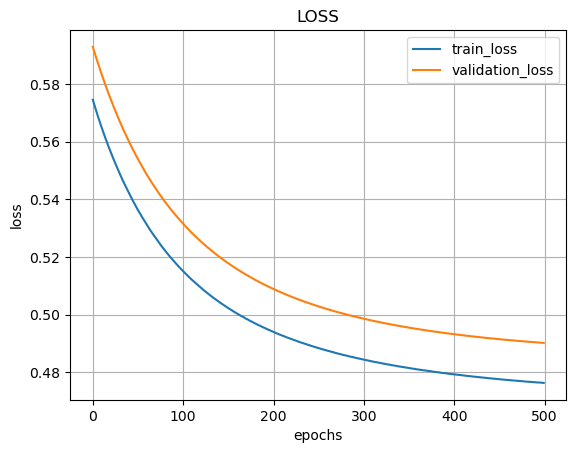

In [115]:
plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정


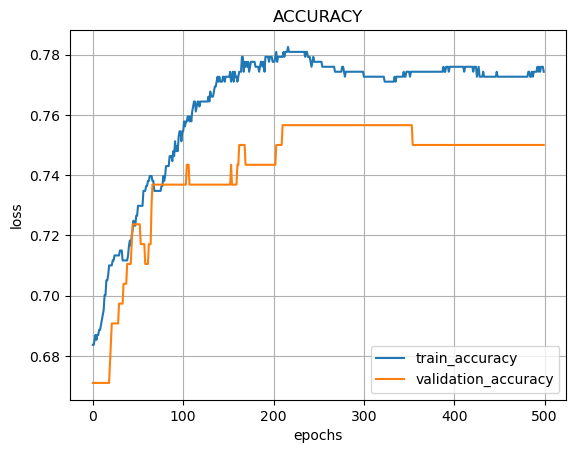

In [117]:
plt.title("ACCURACY")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["accuracy"], label="train_accuracy")
plt.plot(result.history["val_accuracy"], label="validation_accuracy")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정

### 5) 모델 구축(딥러닝)

- hidden layer : 5개
- 입출력 갯수
    - 1st hidden layer : 64개
    - 2nd hidden layer : 128개
    - 3rd ~ 5th hidden layer :  256개
- Activation Function : sigmoid, relu
- Metrics(측정도구) : accuracy
- validation : yes
- epochs : 500

In [3]:
data = np.loadtxt("data/diabetes.csv", delimiter=",")

X = data[:, 0:-1]
y = data[:, [-1]]

model = Sequential()

model.add(Flatten(input_shape=(X.shape[1],)))
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=256, activation="relu"))
model.add(Dense(units=256, activation="relu"))
model.add(Dense(units=256, activation="relu"))
model.add(Dense(y.shape[1], activation="sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer=SGD(learning_rate = 0.01), metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 1)                 2

### 6) 모델 학습(딥러닝)

In [4]:
result = model.fit(X, y, validation_split=0.2, epochs=500)

Epoch 1/500
19/19 [==============================] - 1s 12ms/step - loss: 0.6781 - accuracy: 0.6540 - val_loss: 0.6720 - val_accuracy: 0.6447
Epoch 2/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6668 - accuracy: 0.6557 - val_loss: 0.6624 - val_accuracy: 0.6447
Epoch 3/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6577 - accuracy: 0.6557 - val_loss: 0.6548 - val_accuracy: 0.6447
Epoch 4/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6557 - val_loss: 0.6488 - val_accuracy: 0.6447
Epoch 5/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6448 - accuracy: 0.6557 - val_loss: 0.6440 - val_accuracy: 0.6447
Epoch 6/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6401 - accuracy: 0.6557 - val_loss: 0.6403 - val_accuracy: 0.6447
Epoch 7/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6366 - accuracy: 0.6557 - val_loss: 0.6373 - val_accuracy: 0.6447
Epoch 8/500


Epoch 59/500
19/19 [==============================] - 0s 3ms/step - loss: 0.4881 - accuracy: 0.7809 - val_loss: 0.4869 - val_accuracy: 0.7303
Epoch 60/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4863 - accuracy: 0.7875 - val_loss: 0.4850 - val_accuracy: 0.7434
Epoch 61/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4837 - accuracy: 0.7759 - val_loss: 0.4829 - val_accuracy: 0.7303
Epoch 62/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4817 - accuracy: 0.7825 - val_loss: 0.4812 - val_accuracy: 0.7303
Epoch 63/500
19/19 [==============================] - 0s 3ms/step - loss: 0.4789 - accuracy: 0.7710 - val_loss: 0.4813 - val_accuracy: 0.7434
Epoch 64/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4788 - accuracy: 0.7792 - val_loss: 0.4786 - val_accuracy: 0.7303
Epoch 65/500
19/19 [==============================] - 0s 3ms/step - loss: 0.4757 - accuracy: 0.7858 - val_loss: 0.4769 - val_accuracy: 0.7303
Epoch 

19/19 [==============================] - 0s 3ms/step - loss: 0.4252 - accuracy: 0.7842 - val_loss: 0.4598 - val_accuracy: 0.7632
Epoch 174/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4253 - accuracy: 0.7957 - val_loss: 0.4596 - val_accuracy: 0.7632
Epoch 175/500
19/19 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.7924 - val_loss: 0.4591 - val_accuracy: 0.7632
Epoch 176/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4244 - accuracy: 0.7974 - val_loss: 0.4673 - val_accuracy: 0.7895
Epoch 177/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4256 - accuracy: 0.7941 - val_loss: 0.4588 - val_accuracy: 0.7566
Epoch 178/500
19/19 [==============================] - 0s 3ms/step - loss: 0.4264 - accuracy: 0.7875 - val_loss: 0.4611 - val_accuracy: 0.7697
Epoch 179/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4251 - accuracy: 0.7891 - val_loss: 0.4602 - val_accuracy: 0.7368
Epoch 180/500

19/19 [==============================] - 0s 4ms/step - loss: 0.3966 - accuracy: 0.8072 - val_loss: 0.4709 - val_accuracy: 0.7500
Epoch 288/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3954 - accuracy: 0.8105 - val_loss: 0.4683 - val_accuracy: 0.7434
Epoch 289/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3977 - accuracy: 0.8155 - val_loss: 0.4691 - val_accuracy: 0.7763
Epoch 290/500
19/19 [==============================] - 0s 3ms/step - loss: 0.4008 - accuracy: 0.8105 - val_loss: 0.4781 - val_accuracy: 0.7895
Epoch 291/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3935 - accuracy: 0.8138 - val_loss: 0.4670 - val_accuracy: 0.7763
Epoch 292/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3994 - accuracy: 0.8105 - val_loss: 0.4961 - val_accuracy: 0.7697
Epoch 293/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3945 - accuracy: 0.8089 - val_loss: 0.4692 - val_accuracy: 0.7697
Epoch 294/500

19/19 [==============================] - 0s 3ms/step - loss: 0.3722 - accuracy: 0.8237 - val_loss: 0.4856 - val_accuracy: 0.7763
Epoch 402/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3644 - accuracy: 0.8270 - val_loss: 0.4891 - val_accuracy: 0.7500
Epoch 403/500
19/19 [==============================] - 0s 3ms/step - loss: 0.3623 - accuracy: 0.8287 - val_loss: 0.5328 - val_accuracy: 0.7237
Epoch 404/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3739 - accuracy: 0.8237 - val_loss: 0.4915 - val_accuracy: 0.7697
Epoch 405/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3594 - accuracy: 0.8369 - val_loss: 0.4912 - val_accuracy: 0.7434
Epoch 406/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3660 - accuracy: 0.8287 - val_loss: 0.5053 - val_accuracy: 0.7632
Epoch 407/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3661 - accuracy: 0.8254 - val_loss: 0.4887 - val_accuracy: 0.7566
Epoch 408/500

In [5]:
model.evaluate(X, y)

24/24 [==============================] - 0s 1ms/step - loss: 0.4003 - accuracy: 0.8182


[0.4002504348754883, 0.8181818127632141]

-  batch_size: Integer or `None`.
        Number of samples per gradient update.
        If unspecified, `batch_size` will default to 32.
        Do not specify the `batch_size` if your data is in the
        form of datasets, generators, or `keras.utils.Sequence`
        instances (since they generate batches).
- model.fit(batch_szie = None, default is 32)
- Epoch를 1바퀴 돌릴 때, 데이터를 32개씩 조각으로 나눠서 19번 돌리고, batch를 19번 돌린 것이 1 epochs

### 7) sigmoid Only test( 6)과 비교)

In [124]:
data = np.loadtxt("data/diabetes.csv", delimiter=",")

X = data[:, 0:-1]
y = data[:, [-1]]

model = Sequential()

model.add(Flatten(input_shape=(X.shape[1],)))
model.add(Dense(units=64, activation="sigmoid"))
model.add(Dense(units=128, activation="sigmoid"))
model.add(Dense(units=256, activation="sigmoid"))
model.add(Dense(units=256, activation="sigmoid"))
model.add(Dense(units=256, activation="sigmoid"))
model.add(Dense(y.shape[1], activation="sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer=SGD(learning_rate = 0.01), metrics=["accuracy"])
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_32 (Flatten)        (None, 8)                 0         
                                                                 
 dense_69 (Dense)            (None, 64)                576       
                                                                 
 dense_70 (Dense)            (None, 128)               8320      
                                                                 
 dense_71 (Dense)            (None, 256)               33024     
                                                                 
 dense_72 (Dense)            (None, 256)               65792     
                                                                 
 dense_73 (Dense)            (None, 256)               65792     
                                                                 
 dense_74 (Dense)            (None, 1)               

In [125]:
result = model.fit(X, y, validation_split=0.2, epochs=500)

Epoch 1/500
19/19 [==============================] - 1s 8ms/step - loss: 0.6533 - accuracy: 0.6557 - val_loss: 0.6513 - val_accuracy: 0.6447
Epoch 2/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6461 - accuracy: 0.6557 - val_loss: 0.6515 - val_accuracy: 0.6447
Epoch 3/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6459 - accuracy: 0.6557 - val_loss: 0.6536 - val_accuracy: 0.6447
Epoch 4/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6476 - accuracy: 0.6557 - val_loss: 0.6507 - val_accuracy: 0.6447
Epoch 5/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6460 - accuracy: 0.6557 - val_loss: 0.6507 - val_accuracy: 0.6447
Epoch 6/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6464 - accuracy: 0.6557 - val_loss: 0.6528 - val_accuracy: 0.6447
Epoch 7/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6468 - accuracy: 0.6557 - val_loss: 0.6515 - val_accuracy: 0.6447
Epoch 8/500
1

Epoch 59/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6459 - accuracy: 0.6557 - val_loss: 0.6509 - val_accuracy: 0.6447
Epoch 60/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6455 - accuracy: 0.6557 - val_loss: 0.6532 - val_accuracy: 0.6447
Epoch 61/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6457 - accuracy: 0.6557 - val_loss: 0.6513 - val_accuracy: 0.6447
Epoch 62/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6458 - accuracy: 0.6557 - val_loss: 0.6518 - val_accuracy: 0.6447
Epoch 63/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6451 - accuracy: 0.6557 - val_loss: 0.6513 - val_accuracy: 0.6447
Epoch 64/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6455 - accuracy: 0.6557 - val_loss: 0.6507 - val_accuracy: 0.6447
Epoch 65/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6462 - accuracy: 0.6557 - val_loss: 0.6509 - val_accuracy: 0.6447
Epoch 

19/19 [==============================] - 0s 3ms/step - loss: 0.6456 - accuracy: 0.6557 - val_loss: 0.6537 - val_accuracy: 0.6447
Epoch 174/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6473 - accuracy: 0.6557 - val_loss: 0.6508 - val_accuracy: 0.6447
Epoch 175/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6457 - accuracy: 0.6557 - val_loss: 0.6507 - val_accuracy: 0.6447
Epoch 176/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6447 - accuracy: 0.6557 - val_loss: 0.6511 - val_accuracy: 0.6447
Epoch 177/500
19/19 [==============================] - 0s 5ms/step - loss: 0.6482 - accuracy: 0.6557 - val_loss: 0.6509 - val_accuracy: 0.6447
Epoch 178/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6472 - accuracy: 0.6557 - val_loss: 0.6507 - val_accuracy: 0.6447
Epoch 179/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6461 - accuracy: 0.6557 - val_loss: 0.6510 - val_accuracy: 0.6447
Epoch 180/500

19/19 [==============================] - 0s 4ms/step - loss: 0.6460 - accuracy: 0.6557 - val_loss: 0.6509 - val_accuracy: 0.6447
Epoch 288/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6478 - accuracy: 0.6557 - val_loss: 0.6507 - val_accuracy: 0.6447
Epoch 289/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6459 - accuracy: 0.6557 - val_loss: 0.6512 - val_accuracy: 0.6447
Epoch 290/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6450 - accuracy: 0.6557 - val_loss: 0.6510 - val_accuracy: 0.6447
Epoch 291/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6462 - accuracy: 0.6557 - val_loss: 0.6525 - val_accuracy: 0.6447
Epoch 292/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6467 - accuracy: 0.6557 - val_loss: 0.6509 - val_accuracy: 0.6447
Epoch 293/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6440 - accuracy: 0.6557 - val_loss: 0.6551 - val_accuracy: 0.6447
Epoch 294/500

19/19 [==============================] - 0s 3ms/step - loss: 0.6439 - accuracy: 0.6557 - val_loss: 0.6511 - val_accuracy: 0.6447
Epoch 402/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6465 - accuracy: 0.6557 - val_loss: 0.6515 - val_accuracy: 0.6447
Epoch 403/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6467 - accuracy: 0.6557 - val_loss: 0.6508 - val_accuracy: 0.6447
Epoch 404/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6458 - accuracy: 0.6557 - val_loss: 0.6507 - val_accuracy: 0.6447
Epoch 405/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6473 - accuracy: 0.6557 - val_loss: 0.6508 - val_accuracy: 0.6447
Epoch 406/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6453 - accuracy: 0.6557 - val_loss: 0.6510 - val_accuracy: 0.6447
Epoch 407/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6452 - accuracy: 0.6557 - val_loss: 0.6522 - val_accuracy: 0.6447
Epoch 408/500

In [126]:
model.evaluate(X, y)

24/24 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.6535


[0.6456927061080933, 0.6534914374351501]

In [127]:
## relu = loss: 0.3579 - accuracy: 0.8353
## sigmoid = loss: 0.6457 - accuracy: 0.6535

- 그래프 / 6) relu로 그림

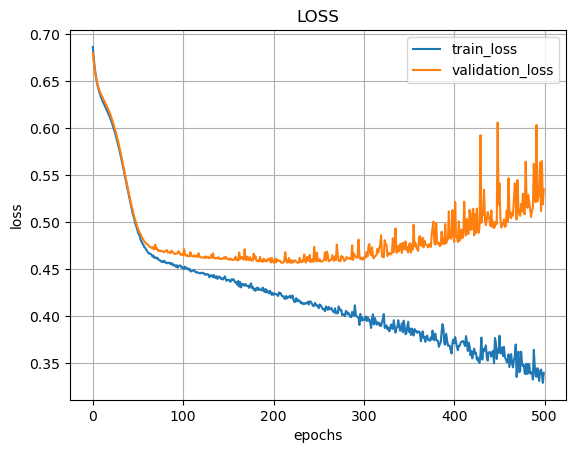

In [135]:
plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정


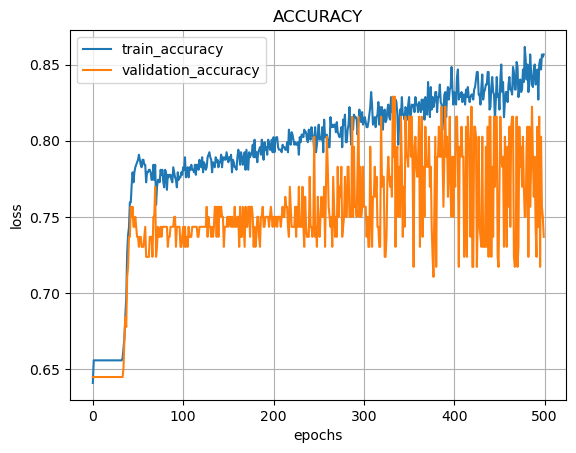

In [136]:
plt.title("ACCURACY")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["accuracy"], label="train_accuracy")
plt.plot(result.history["val_accuracy"], label="validation_accuracy")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정

Object `model.fit` not found.


### 8) validation_data를 사용 + he_normal

In [160]:
data = np.loadtxt("data/diabetes.csv", delimiter=",")

X = data[:, 0:-1]
y = data[:, [-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.4)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)
# 테스트용(40%)에서 다시한번 떼어낸다. # 보통은 훈련용에서 다시 떼어낸다
# X_val, y_val은 정말 마지막에 다시 테스트하기 위한 검증용

model = Sequential()

model.add(Flatten(input_shape=(X.shape[1],)))
model.add(Dense(units=64, activation="relu", kernel_initializer="he_normal"))
#kernel_initializer="he_normal" # 가중치의 초기값을 랜덤으로 두지말고 # 수학적으로 계산된 값을 넣어주면 훨신 정확한 결과를 얻을 수 있다
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=64, activation="relu"))
model.add(Dense(y.shape[1], activation="sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer=SGD(learning_rate = 0.001), metrics=["accuracy"])
model.summary()
# model.compile(loss = "binary_crossentropy", optimizer=Adam(learning_rate = 0.001), metrics=["accuracy"])
# model.summary()
# Adam으로 할 때는 SGD보다 조금 더 learning_rate를 작게 주는 것이 좋다

result = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500)
# validation_data = 내가 검증하고자하는 데이터를 넣는다

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_40 (Flatten)        (None, 8)                 0         
                                                                 
 dense_123 (Dense)           (None, 64)                576       
                                                                 
 dense_124 (Dense)           (None, 64)                4160      
                                                                 
 dense_125 (Dense)           (None, 64)                4160      
                                                                 
 dense_126 (Dense)           (None, 64)                4160      
                                                                 
 dense_127 (Dense)           (None, 64)                4160      
                                                                 
 dense_128 (Dense)           (None, 64)              

Epoch 105/500
15/15 [==============================] - 0s 4ms/step - loss: 0.6366 - accuracy: 0.6396 - val_loss: 0.6014 - val_accuracy: 0.7039
Epoch 106/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6364 - accuracy: 0.6396 - val_loss: 0.6012 - val_accuracy: 0.7039
Epoch 107/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6362 - accuracy: 0.6396 - val_loss: 0.6009 - val_accuracy: 0.7039
Epoch 108/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6360 - accuracy: 0.6396 - val_loss: 0.6006 - val_accuracy: 0.7039
Epoch 109/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6358 - accuracy: 0.6396 - val_loss: 0.6003 - val_accuracy: 0.7039
Epoch 110/500
15/15 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.6396 - val_loss: 0.5999 - val_accuracy: 0.7039
Epoch 111/500
15/15 [==============================] - 0s 4ms/step - loss: 0.6354 - accuracy: 0.6396 - val_loss: 0.5997 - val_accuracy: 0.7039

15/15 [==============================] - 0s 3ms/step - loss: 0.6047 - accuracy: 0.6396 - val_loss: 0.5620 - val_accuracy: 0.7039
Epoch 220/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6043 - accuracy: 0.6396 - val_loss: 0.5616 - val_accuracy: 0.7039
Epoch 221/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6039 - accuracy: 0.6396 - val_loss: 0.5614 - val_accuracy: 0.7039
Epoch 222/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6035 - accuracy: 0.6396 - val_loss: 0.5611 - val_accuracy: 0.7039
Epoch 223/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6032 - accuracy: 0.6396 - val_loss: 0.5608 - val_accuracy: 0.7039
Epoch 224/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6028 - accuracy: 0.6396 - val_loss: 0.5604 - val_accuracy: 0.7039
Epoch 225/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6024 - accuracy: 0.6396 - val_loss: 0.5598 - val_accuracy: 0.7039
Epoch 226/500

15/15 [==============================] - 0s 4ms/step - loss: 0.5542 - accuracy: 0.6857 - val_loss: 0.5055 - val_accuracy: 0.7171
Epoch 334/500
15/15 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.6901 - val_loss: 0.5046 - val_accuracy: 0.7237
Epoch 335/500
15/15 [==============================] - 0s 2ms/step - loss: 0.5533 - accuracy: 0.6879 - val_loss: 0.5050 - val_accuracy: 0.7237
Epoch 336/500
15/15 [==============================] - 0s 4ms/step - loss: 0.5527 - accuracy: 0.7055 - val_loss: 0.5046 - val_accuracy: 0.7171
Epoch 337/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5522 - accuracy: 0.7011 - val_loss: 0.5038 - val_accuracy: 0.7171
Epoch 338/500
15/15 [==============================] - 0s 2ms/step - loss: 0.5517 - accuracy: 0.7033 - val_loss: 0.5031 - val_accuracy: 0.7171
Epoch 339/500
15/15 [==============================] - 0s 4ms/step - loss: 0.5513 - accuracy: 0.7033 - val_loss: 0.5031 - val_accuracy: 0.7237
Epoch 340/500

15/15 [==============================] - 0s 3ms/step - loss: 0.5056 - accuracy: 0.7604 - val_loss: 0.4570 - val_accuracy: 0.7763
Epoch 448/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5053 - accuracy: 0.7626 - val_loss: 0.4585 - val_accuracy: 0.7763
Epoch 449/500
15/15 [==============================] - 0s 4ms/step - loss: 0.5048 - accuracy: 0.7604 - val_loss: 0.4580 - val_accuracy: 0.7763
Epoch 450/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5044 - accuracy: 0.7604 - val_loss: 0.4580 - val_accuracy: 0.7763
Epoch 451/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5043 - accuracy: 0.7582 - val_loss: 0.4576 - val_accuracy: 0.7763
Epoch 452/500
15/15 [==============================] - 0s 4ms/step - loss: 0.5037 - accuracy: 0.7604 - val_loss: 0.4577 - val_accuracy: 0.7763
Epoch 453/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5035 - accuracy: 0.7582 - val_loss: 0.4567 - val_accuracy: 0.7763
Epoch 454/500

In [161]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 773us/step - loss: 0.4548 - accuracy: 0.8026


[0.45477524399757385, 0.8026315569877625]

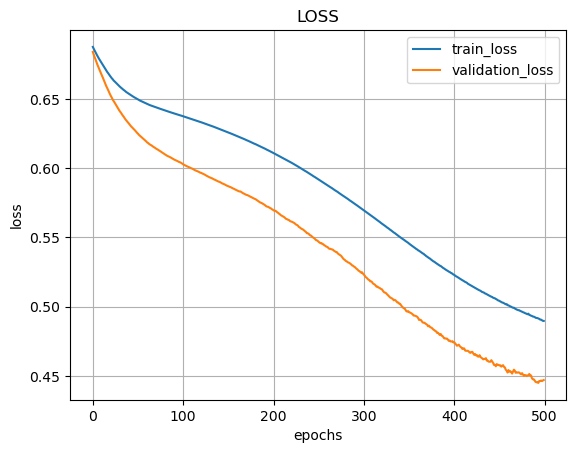

In [162]:
plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정


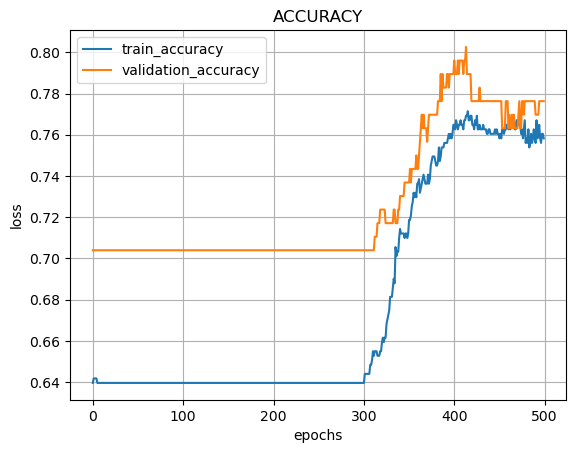

In [163]:
plt.title("ACCURACY")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["accuracy"], label="train_accuracy")
plt.plot(result.history["val_accuracy"], label="validation_accuracy")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정

## (4) 고객 이탈율 예측

In [108]:
df = pd.read_csv("data/Customer_Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### 1) Data Definition

In [110]:
# 필요없는 RowNumber, Customerld, Surname 삭제

In [111]:
X = df.drop(labels=["RowNumber", "CustomerId", "Surname", "Exited"], axis=1)
y = df[["Exited"]]

In [112]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [113]:
X = df.iloc[:,3:-1]
y = df.iloc[:,[-1]]

In [114]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [115]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


### 2) Preprocessing - Netsong version

In [116]:
### 레이블 인코딩 - 강사님
label1 = LabelEncoder()
X["Gender"] = label1.fit_transform(X["Gender"])

label2 = LabelEncoder()
X["Geography"] = label1.fit_transform(X["Geography"])

In [117]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [118]:
### 원핫 인코딩 - 강사님

In [119]:
X = pd.get_dummies(X, columns=["Geography"], drop_first=True) 
# 지역이 3개의 컬럼화되고 0과 1로 바뀌었다.
# Geography_0	Geography_1이 둘다 0이라면 Geography_2는 당연히 1인데 변수가 3개일 필요가 있을까?(옵션추가)
# drop_first=True : 첫번째 변수는 버려라

In [120]:
##### 정규화

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify=y, test_size=.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 2) Preprocessing

In [49]:
### 레이블 인코딩 - 나
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [213]:
X["Gender"] = X["Gender"].str[:1] # Gender의 앞글자1개만 남겨두기

In [214]:
X["Geography"] = X["Geography"].str[:1] # Geography의 앞글자1개만 남겨두기

In [215]:
features = ["Gender", "Geography"]

for f in features:
    le = LabelEncoder()
    le.fit(X[f])
    X[f] = le.transform(X[f])

In [216]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [192]:
#### 정규화

In [217]:
scaler = MinMaxScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

In [219]:
X = X_scaled

### 3) 모델 구축 - Netsong version

- hidden layer : 6개
- 각 입출력 갯수 : 128개
- 가중치 초기화 : he_normal
- Activation Function : relu
- Optimizer : Adam(0.001)
- epochs : 100
- validation : yes

In [121]:
model = Sequential()


model.add(Dense(128, input_shape=(X.shape[1],), kernel_initializer="he_normal", activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(128, activation="relu")) # units는 쓰나 안쓰나 똑같음.
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(y.shape[1], activation="sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer=Adam(learning_rate = 0.001), metrics=["accuracy"])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 128)               1536      
                                                                 
 dense_36 (Dense)            (None, 128)               16512     
                                                                 
 dense_37 (Dense)            (None, 128)               16512     
                                                                 
 dense_38 (Dense)            (None, 128)               16512     
                                                                 
 dense_39 (Dense)            (None, 128)               16512     
                                                                 
 dense_40 (Dense)            (None, 128)               16512     
                                                                 
 dense_41 (Dense)            (None, 1)                

In [122]:
result = model.fit(X_train, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.4210 - accuracy: 0.8198 - val_loss: 0.3670 - val_accuracy: 0.8525
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3602 - accuracy: 0.8502 - val_loss: 0.3719 - val_accuracy: 0.8469
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3451 - accuracy: 0.8597 - val_loss: 0.3491 - val_accuracy: 0.8544
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8648 - val_loss: 0.3463 - val_accuracy: 0.8562
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3267 - accuracy: 0.8670 - val_loss: 0.3513 - val_accuracy: 0.8512
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8698 - val_loss: 0.3565 - val_accuracy: 0.8537
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8694 - val_loss: 0.3458 - val_accuracy: 0.8562

Epoch 58/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0478 - accuracy: 0.9823 - val_loss: 1.2544 - val_accuracy: 0.8112
Epoch 59/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0460 - accuracy: 0.9827 - val_loss: 1.1825 - val_accuracy: 0.8313
Epoch 60/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9794 - val_loss: 1.1115 - val_accuracy: 0.8200
Epoch 61/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9836 - val_loss: 1.2294 - val_accuracy: 0.8144
Epoch 62/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9833 - val_loss: 1.1479 - val_accuracy: 0.8163
Epoch 63/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 0.9839 - val_loss: 1.2529 - val_accuracy: 0.8244
Epoch 64/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.9839 - val_loss: 1.1665 - val_accuracy:

In [35]:
### hidden layer 3개
# loss: 0.0302 - accuracy: 0.9905 - val_loss: 1.3779 - val_accuracy: 0.8181
# 훈련 정확도 99, 테스트 정확도 81 = 엄청난 과적합

In [ ]:
### hidden layer 6개
# loss: 0.0326 - accuracy: 0.9891 - val_loss: 1.2269 - val_accuracy: 0.8200
# 훈련 정확도 96, 테스트 정확도 82 = 여전히 과적합

In [ ]:
### hidden layer 6개 + 가중치 초기화
# loss: 0.0266 - accuracy: 0.9906 - val_loss: 1.3790 - val_accuracy: 0.8263
# 훈련 정확도 99, 테스트 정확도 82 = 여전히 과적합이 매우 심한 상태

In [126]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 935us/step - loss: 1.2723 - accuracy: 0.8090


[1.2723338603973389, 0.8090000152587891]

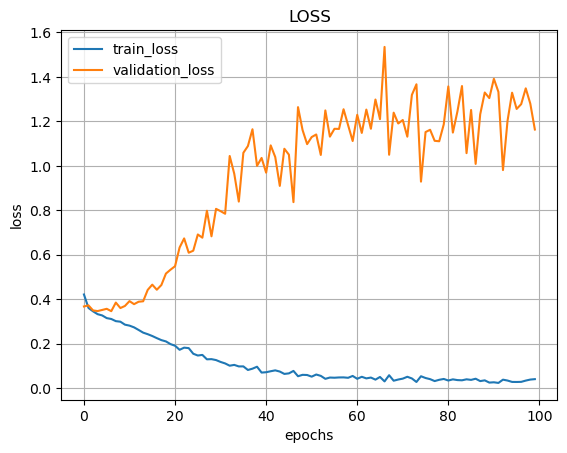

In [124]:
plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정


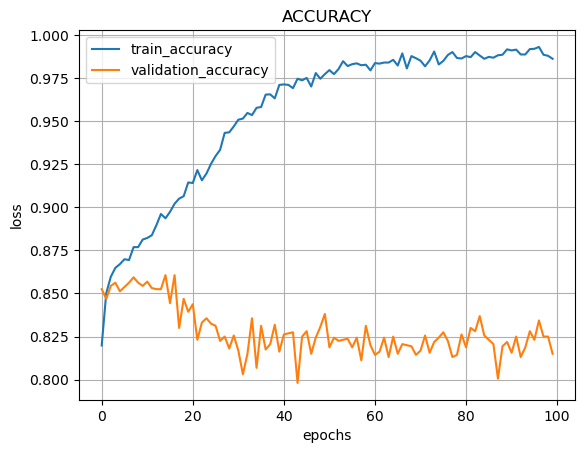

In [125]:
plt.title("ACCURACY")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["accuracy"], label="train_accuracy")
plt.plot(result.history["val_accuracy"], label="validation_accuracy")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정